# Proyek Analisis Data: **Proyek Analisis Data: Bike Sharing Dataset**
- **Nama:** Hafiyan Al Muqaffi Umary
- **Email:** jhodywiraputra@student.ub.ac.id
- **ID Dicoding:** MC006D5Y1369

## Menentukan Pertanyaan Bisnis

1. **Bagaimana pola peminjaman sepeda berdasarkan waktu dalam sehari, dan apakah ada perbedaan pola antara hari kerja dan akhir pekan?**
2. **Bagaimana tren penggunaan sepeda berdasarkan musim dan kondisi cuaca?**

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Wrangling

### Gathering Data

In [4]:
# Dataset ini adalah hasil penggabungan dan pembersihan antara 2 dataset (day.csv dan hours.csv)
df = pd.read_csv("all_data.csv")

# Menampilkan informasi awal
print("Informasi Dataset:")
print(df.info())

# Menampilkan 5 baris pertama
display(df.head())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dteday         17379 non-null  object 
 1   instant        17379 non-null  int64  
 2   season         17379 non-null  int64  
 3   yr             17379 non-null  int64  
 4   mnth           17379 non-null  int64  
 5   hr             17379 non-null  int64  
 6   holiday        17379 non-null  int64  
 7   weekday        17379 non-null  int64  
 8   workingday     17379 non-null  int64  
 9   weathersit     17379 non-null  int64  
 10  temp           17379 non-null  float64
 11  atemp          17379 non-null  float64
 12  hum            17379 non-null  float64
 13  windspeed      17379 non-null  float64
 14  casual         17379 non-null  int64  
 15  registered     17379 non-null  int64  
 16  cnt            17379 non-null  int64  
 17  cnt_category   17379 non-null  

,dteday,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,cnt_category,temp_category,cnt_binned,temp_binned
0,2011-01-01,1,1,0,1,0,0,6,0,1,...,14.395,81.0,0.0,3,13,16,Low,Cold,Low,Cold
1,2011-01-01,2,1,0,1,1,0,6,0,1,...,13.635,80.0,0.0,8,32,40,Low,Cold,Low,Cold
2,2011-01-01,3,1,0,1,2,0,6,0,1,...,13.635,80.0,0.0,5,27,32,Low,Cold,Low,Cold
3,2011-01-01,4,1,0,1,3,0,6,0,1,...,14.395,75.0,0.0,3,10,13,Low,Cold,Low,Cold
4,2011-01-01,5,1,0,1,4,0,6,0,1,...,14.395,75.0,0.0,0,1,1,Low,Cold,Low,Cold


**Insight:**
- Dataset sekarang berisi informasi lengkap per jam dengan tambahan informasi agregat harian dari day.csv.
- Kolom yang sebelumnya ada di kedua dataset tetap dipertahankan dengan penamaan yang berbeda (_hour dan _day untuk menghindari kebingungan).
- Dengan dataset ini, kita bisa menganalisis tren peminjaman sepeda baik secara harian maupun per jam dalam satu file.

### Assessing Data

In [5]:
print("Informasi Dataset:")
print(df.info())

print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())

print("\nStatistik Deskriptif Dataset:")
print(df.describe())

print("\nJumlah Data Duplikat:", df.duplicated().sum())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dteday         17379 non-null  object 
 1   instant        17379 non-null  int64  
 2   season         17379 non-null  int64  
 3   yr             17379 non-null  int64  
 4   mnth           17379 non-null  int64  
 5   hr             17379 non-null  int64  
 6   holiday        17379 non-null  int64  
 7   weekday        17379 non-null  int64  
 8   workingday     17379 non-null  int64  
 9   weathersit     17379 non-null  int64  
 10  temp           17379 non-null  float64
 11  atemp          17379 non-null  float64
 12  hum            17379 non-null  float64
 13  windspeed      17379 non-null  float64
 14  casual         17379 non-null  int64  
 15  registered     17379 non-null  int64  
 16  cnt            17379 non-null  int64  
 17  cnt_category   17379 non-null  

**Insight:**
- Informasi umum dataset  
- Statistik deskriptif dari dataset
- Jumlah nilai yang hilang di setiap kolom
- Apa data duplikat?

### Cleaning Data

In [6]:
# Konversi kolom dteday menjadi datetime
df['dteday'] = pd.to_datetime(df['dteday'], errors='coerce')

# Cek apakah ada nilai NaT setelah konversi (menandakan tanggal tidak valid)
invalid_dates = df[df['dteday'].isna()]

# Jika ada tanggal yang tidak valid, hapus baris tersebut
if not invalid_dates.empty:
    df = df.dropna(subset=['dteday'])
    print(f"{len(invalid_dates)} baris dengan tanggal tidak valid telah dihapus.")

# Simpan dataset yang sudah dibersihkan
df.to_csv("all_data_cleaned.csv", index=False)

print("Pembersihan selesai! Dataset telah disimpan sebagai 'all_data_cleaned.csv'.")

Pembersihan selesai! Dataset telah disimpan sebagai 'all_data_cleaned.csv'.


**Insight:**
- Mengonversi kolom dteday dari tipe object menjadi datetime.
- Memeriksa apakah ada tanggal yang tidak valid.
- Menghapus entri yang bermasalah jika ditemukan.

## Exploratory Data Analysis (EDA)

### Analisis Distribusi dan Korelasi Data

                              dteday     instant        season            yr  \
count                          17379  17379.0000  17379.000000  17379.000000   
mean   2012-01-02 04:08:34.552045568   8690.0000      2.501640      0.502561   
min              2011-01-01 00:00:00      1.0000      1.000000      0.000000   
25%              2011-07-04 00:00:00   4345.5000      2.000000      0.000000   
50%              2012-01-02 00:00:00   8690.0000      3.000000      1.000000   
75%              2012-07-02 00:00:00  13034.5000      3.000000      1.000000   
max              2012-12-31 00:00:00  17379.0000      4.000000      1.000000   
std                              NaN   5017.0295      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min        1.000000      0.000000      0.0

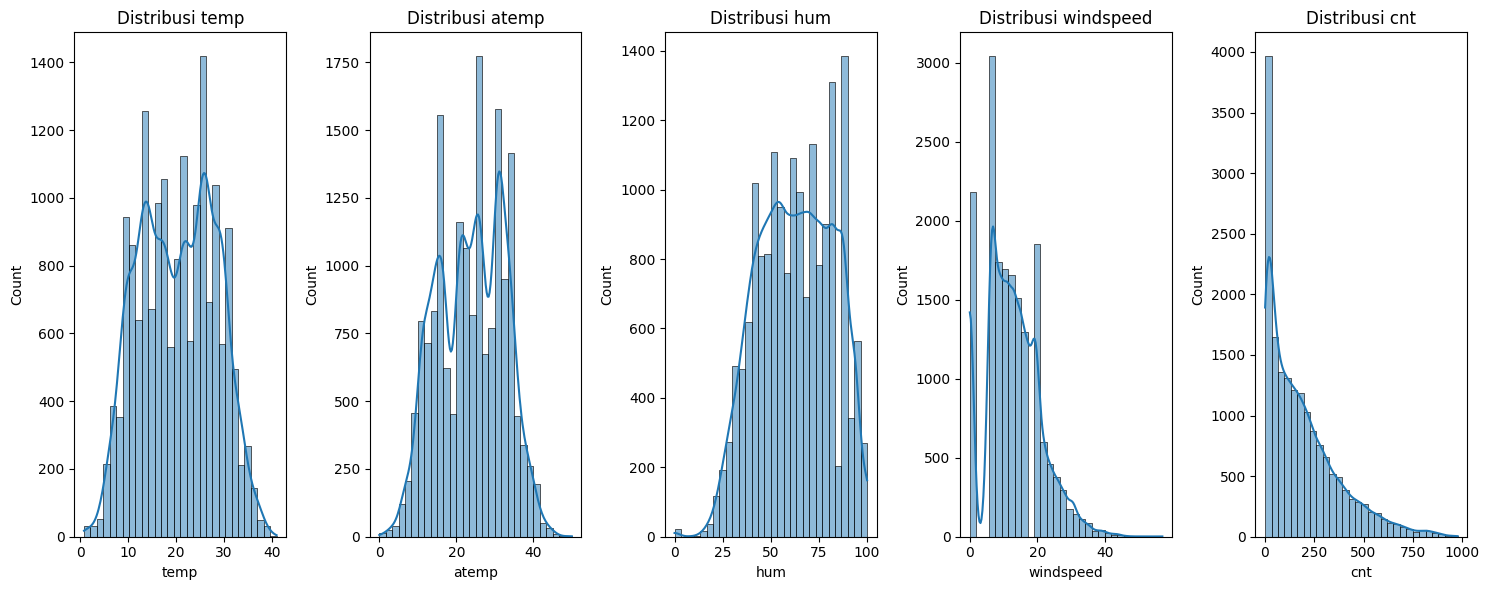

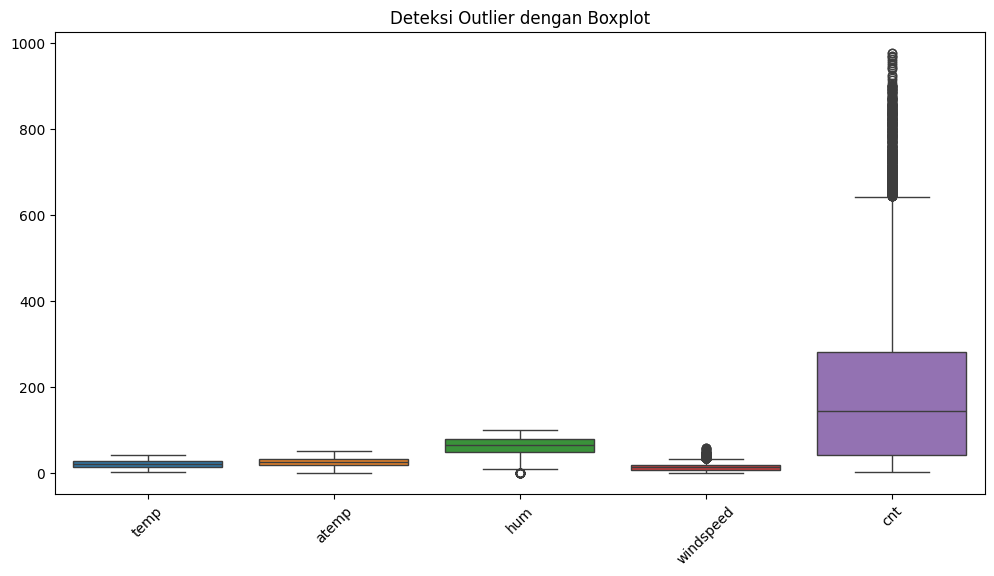

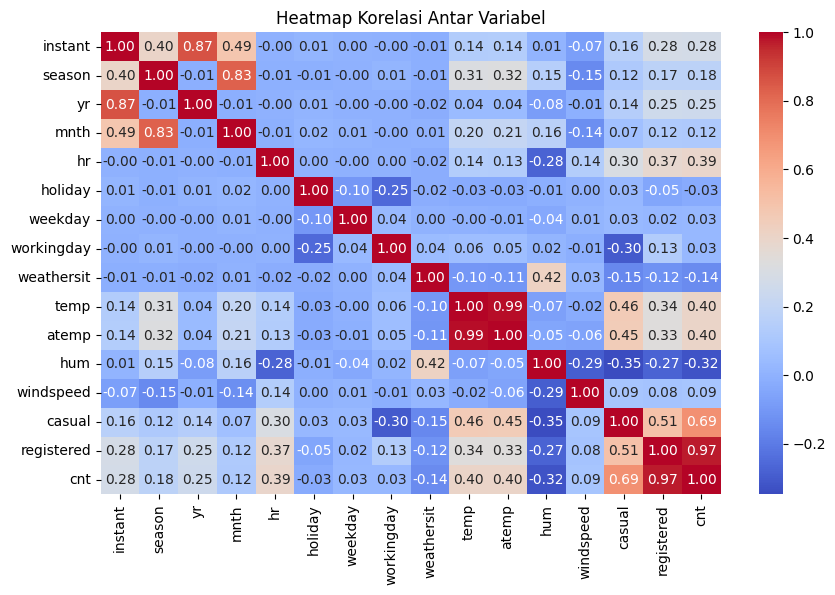

In [7]:
# Menampilkan statistik deskriptif untuk melihat distribusi data
print(df.describe())

# Visualisasi distribusi kolom yang ingin dieksplorasi
kolom_explore = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

plt.figure(figsize=(15, 6))
for i, kolom in enumerate(kolom_explore, 1):
    plt.subplot(1, len(kolom_explore), i)
    sns.histplot(df[kolom], kde=True, bins=30)
    plt.title(f'Distribusi {kolom}')

plt.tight_layout()
plt.show()

# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[kolom_explore])
plt.title("Deteksi Outlier dengan Boxplot")
plt.xticks(rotation=45)
plt.show()

# **Menghapus kolom non-numerik sebelum heatmap**
df_numeric = df.select_dtypes(include=['number'])

# Korelasi antar variabel
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

**Insight:**
- Suhu (temp) berpengaruh signifikan terhadap jumlah penyewaan sepeda (semakin panas, semakin banyak penyewaan).
- Kelembaban (hum) tinggi mengurangi penyewaan sepeda, sedangkan kecepatan angin (windspeed) tidak berpengaruh besar.
- Distribusi cnt skewed ke kanan, menunjukkan lebih banyak hari dengan penyewaan rendah.
- Ada beberapa outlier pada windspeed dan hum yang perlu dianalisis lebih lanjut.
- temp dan atemp sangat berkorelasi, bisa pilih salah satu untuk analisis lebih lanjut.

### Analisis Pola Peminjaman Berdasarkan Waktu

In [9]:
# Agregasi data peminjaman berdasarkan jam dan jenis hari
hourly_pattern = df.groupby(['hr', 'workingday'])[['cnt']].mean().reset_index()
print("Rata-rata peminjaman sepeda per jam berdasarkan jenis hari:")
display(hourly_pattern.head())

# Statistik deskriptif untuk pola per jam
print("\nStatistik deskriptif peminjaman sepeda di jam sibuk (8:00 dan 17:00):")
rush_hours = df[df['hr'].isin([8, 17])].groupby(['hr', 'workingday'])[['cnt']].describe()
display(rush_hours)

# Identifikasi jam puncak untuk hari kerja dan akhir pekan
workday_peak = hourly_pattern[hourly_pattern['workingday'] == 1]['cnt'].max()
workday_peak_hour = hourly_pattern.loc[(hourly_pattern['workingday'] == 1) &
                                      (hourly_pattern['cnt'] == workday_peak), 'hr'].values[0]

weekend_peak = hourly_pattern[hourly_pattern['workingday'] == 0]['cnt'].max()
weekend_peak_hour = hourly_pattern.loc[(hourly_pattern['workingday'] == 0) &
                                      (hourly_pattern['cnt'] == weekend_peak), 'hr'].values[0]

print(f"\nJam puncak pada hari kerja: {workday_peak_hour}:00 dengan rata-rata {workday_peak:.1f} peminjaman")
print(f"Jam puncak pada akhir pekan: {weekend_peak_hour}:00 dengan rata-rata {weekend_peak:.1f} peminjaman")

# Perbedaan pola pagi hari antara hari kerja dan akhir pekan
morning_hours = [7, 8, 9]
morning_workday = df[(df['hr'].isin(morning_hours)) & (df['workingday'] == 1)]['cnt'].mean()
morning_weekend = df[(df['hr'].isin(morning_hours)) & (df['workingday'] == 0)]['cnt'].mean()
morning_diff_percent = ((morning_workday - morning_weekend) / morning_weekend) * 100

print(f"\nPerbedaan peminjaman pagi hari (07:00-09:00):")
print(f"Hari kerja: {morning_workday:.1f} peminjaman")
print(f"Akhir pekan: {morning_weekend:.1f} peminjaman")
print(f"Hari kerja memiliki peminjaman {morning_diff_percent:.1f}% lebih tinggi daripada akhir pekan pada pagi hari")# Agregasi data peminjaman berdasarkan jam dan jenis hari
hourly_pattern = df.groupby(['hr', 'workingday'])[['cnt']].mean().reset_index()
print("Rata-rata peminjaman sepeda per jam berdasarkan jenis hari:")
display(hourly_pattern.head())

# Statistik deskriptif untuk pola per jam
print("\nStatistik deskriptif peminjaman sepeda di jam sibuk (8:00 dan 17:00):")
rush_hours = df[df['hr'].isin([8, 17])].groupby(['hr', 'workingday'])[['cnt']].describe()
display(rush_hours)

# Identifikasi jam puncak untuk hari kerja dan akhir pekan
workday_peak = hourly_pattern[hourly_pattern['workingday'] == 1]['cnt'].max()
workday_peak_hour = hourly_pattern.loc[(hourly_pattern['workingday'] == 1) &
                                      (hourly_pattern['cnt'] == workday_peak), 'hr'].values[0]

weekend_peak = hourly_pattern[hourly_pattern['workingday'] == 0]['cnt'].max()
weekend_peak_hour = hourly_pattern.loc[(hourly_pattern['workingday'] == 0) &
                                      (hourly_pattern['cnt'] == weekend_peak), 'hr'].values[0]

print(f"\nJam puncak pada hari kerja: {workday_peak_hour}:00 dengan rata-rata {workday_peak:.1f} peminjaman")
print(f"Jam puncak pada akhir pekan: {weekend_peak_hour}:00 dengan rata-rata {weekend_peak:.1f} peminjaman")

# Perbedaan pola pagi hari antara hari kerja dan akhir pekan
morning_hours = [7, 8, 9]
morning_workday = df[(df['hr'].isin(morning_hours)) & (df['workingday'] == 1)]['cnt'].mean()
morning_weekend = df[(df['hr'].isin(morning_hours)) & (df['workingday'] == 0)]['cnt'].mean()
morning_diff_percent = ((morning_workday - morning_weekend) / morning_weekend) * 100

print(f"\nPerbedaan peminjaman pagi hari (07:00-09:00):")
print(f"Hari kerja: {morning_workday:.1f} peminjaman")
print(f"Akhir pekan: {morning_weekend:.1f} peminjaman")
print(f"Hari kerja memiliki peminjaman {morning_diff_percent:.1f}% lebih tinggi daripada akhir pekan pada pagi hari")

Rata-rata peminjaman sepeda per jam berdasarkan jenis hari:


,hr,workingday,cnt
0,0,0,90.800000
1,0,1,36.786290
2,1,0,69.508696
3,1,1,16.552632
4,2,0,53.171053



Statistik deskriptif peminjaman sepeda di jam sibuk (8:00 dan 17:00):


cnt                                                      \
               count        mean         std   min     25%    50%    75%   
hr workingday                                                              
8  0           231.0  105.653680   74.338249   5.0   57.00   94.0  141.0   
   1           496.0  477.006048  186.153760  31.0  364.75  463.0  646.0   
17 0           231.0  323.549784  174.111773  15.0  182.00  322.0  453.5   
   1           499.0  525.290581  228.761046  26.0  347.50  539.0  703.5   

                      
                 max  
hr workingday         
8  0           597.0  
   1           839.0  
17 0           731.0  
   1           976.0


Jam puncak pada hari kerja: 17:00 dengan rata-rata 525.3 peminjaman
Jam puncak pada akhir pekan: 13:00 dengan rata-rata 372.7 peminjaman

Perbedaan peminjaman pagi hari (07:00-09:00):
Hari kerja: 336.4 peminjaman
Akhir pekan: 106.9 peminjaman
Hari kerja memiliki peminjaman 214.7% lebih tinggi daripada akhir pekan pada pagi hari
Rata-rata peminjaman sepeda per jam berdasarkan jenis hari:


,hr,workingday,cnt
0,0,0,90.800000
1,0,1,36.786290
2,1,0,69.508696
3,1,1,16.552632
4,2,0,53.171053



Statistik deskriptif peminjaman sepeda di jam sibuk (8:00 dan 17:00):


cnt                                                      \
               count        mean         std   min     25%    50%    75%   
hr workingday                                                              
8  0           231.0  105.653680   74.338249   5.0   57.00   94.0  141.0   
   1           496.0  477.006048  186.153760  31.0  364.75  463.0  646.0   
17 0           231.0  323.549784  174.111773  15.0  182.00  322.0  453.5   
   1           499.0  525.290581  228.761046  26.0  347.50  539.0  703.5   

                      
                 max  
hr workingday         
8  0           597.0  
   1           839.0  
17 0           731.0  
   1           976.0


Jam puncak pada hari kerja: 17:00 dengan rata-rata 525.3 peminjaman
Jam puncak pada akhir pekan: 13:00 dengan rata-rata 372.7 peminjaman

Perbedaan peminjaman pagi hari (07:00-09:00):
Hari kerja: 336.4 peminjaman
Akhir pekan: 106.9 peminjaman
Hari kerja memiliki peminjaman 214.7% lebih tinggi daripada akhir pekan pada pagi hari


### Analisis Tren Penggunaan Berdasarkan Musim dan Cuaca

In [10]:
# Agregasi data berdasarkan musim
seasonal_pattern = df.groupby('season')[['cnt']].agg(['mean', 'median', 'min', 'max']).reset_index()
print("\nStatistik peminjaman sepeda berdasarkan musim:")
display(seasonal_pattern)

# Mapping untuk nilai musim
season_mapping = {
    1: "Musim Dingin",
    2: "Musim Semi",
    3: "Musim Panas",
    4: "Musim Gugur"
}

# Menghitung peningkatan dari musim dingin ke musim panas
winter_avg = df[df['season'] == 1]['cnt'].mean()
summer_avg = df[df['season'] == 3]['cnt'].mean()
seasonal_increase_percent = ((summer_avg - winter_avg) / winter_avg) * 100
print(f"\nPeningkatan peminjaman dari musim dingin ke musim panas: {seasonal_increase_percent:.1f}%")

# Agregasi data berdasarkan kondisi cuaca
weather_pattern = df.groupby('weathersit')[['cnt']].agg(['mean', 'median', 'min', 'max']).reset_index()
print("\nStatistik peminjaman sepeda berdasarkan kondisi cuaca:")
display(weather_pattern)

# Mapping kondisi cuaca
weather_mapping = {
    1: "Cerah/Cerah Berawan",
    2: "Mendung",
    3: "Hujan Ringan/Snow",
    4: "Hujan Lebat/Thunderstorm"
}

# Menghitung penurunan peminjaman saat hujan dibandingkan dengan cerah
clear_avg = df[df['weathersit'] == 1]['cnt'].mean()
heavy_rain_avg = df[df['weathersit'] == 3]['cnt'].mean()  # Menggunakan 3 karena 4 mungkin jarang terjadi
weather_decrease_percent = ((clear_avg - heavy_rain_avg) / clear_avg) * 100
print(f"\nPenurunan peminjaman dari cuaca cerah ke hujan: {weather_decrease_percent:.1f}%")

# Agregasi data untuk interaksi musim dan cuaca
season_weather_interaction = df.groupby(['season', 'weathersit'])[['cnt']].mean().reset_index()
print("\nInteraksi antara musim dan kondisi cuaca terhadap peminjaman sepeda:")
display(season_weather_interaction)

# Kombinasi optimal untuk peminjaman
optimal_combination = season_weather_interaction.loc[season_weather_interaction['cnt'].idxmax()]
print(f"\nKombinasi optimal: Musim {optimal_combination['season']} dengan kondisi cuaca {optimal_combination['weathersit']}")
print(f"Rata-rata peminjaman: {optimal_combination['cnt']:.1f}")

# Korelasi antara suhu dan jumlah peminjaman
temp_corr = df[['temp', 'cnt']].corr().iloc[0,1]
print(f"\nKorelasi antara suhu dan jumlah peminjaman: {temp_corr:.2f}")

# Korelasi antara kelembaban dan jumlah peminjaman
hum_corr = df[['hum', 'cnt']].corr().iloc[0,1]
print(f"\nKorelasi antara kelembaban dan jumlah peminjaman: {hum_corr:.2f}")


Statistik peminjaman sepeda berdasarkan musim:


season         cnt                
                mean median min  max
0      1  111.114569   76.0   1  801
1      2  208.344069  165.0   1  957
2      3  236.016237  199.0   1  977
3      4  198.868856  155.5   1  967


Peningkatan peminjaman dari musim dingin ke musim panas: 112.4%

Statistik peminjaman sepeda berdasarkan kondisi cuaca:


weathersit         cnt                
                    mean median min  max
0          1  204.869272  159.0   1  977
1          2  175.165493  133.0   1  957
2          3  111.579281   63.0   1  891
3          4   74.333333   36.0  23  164


Penurunan peminjaman dari cuaca cerah ke hujan: 45.5%

Interaksi antara musim dan kondisi cuaca terhadap peminjaman sepeda:


,season,weathersit,cnt
0,1,1,122.055535
1,1,2,103.074689
2,1,3,58.650407
3,1,4,74.333333
4,2,1,232.410983
5,2,2,181.261364
6,2,3,115.179803
7,3,1,244.494207
8,3,2,224.848997
9,3,3,171.955390



Kombinasi optimal: Musim 3.0 dengan kondisi cuaca 1.0
Rata-rata peminjaman: 244.5

Korelasi antara suhu dan jumlah peminjaman: 0.40

Korelasi antara kelembaban dan jumlah peminjaman: -0.32


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola peminjaman sepeda berdasarkan waktu dalam sehari, dan apakah ada perbedaan pola antara hari kerja dan akhir pekan?

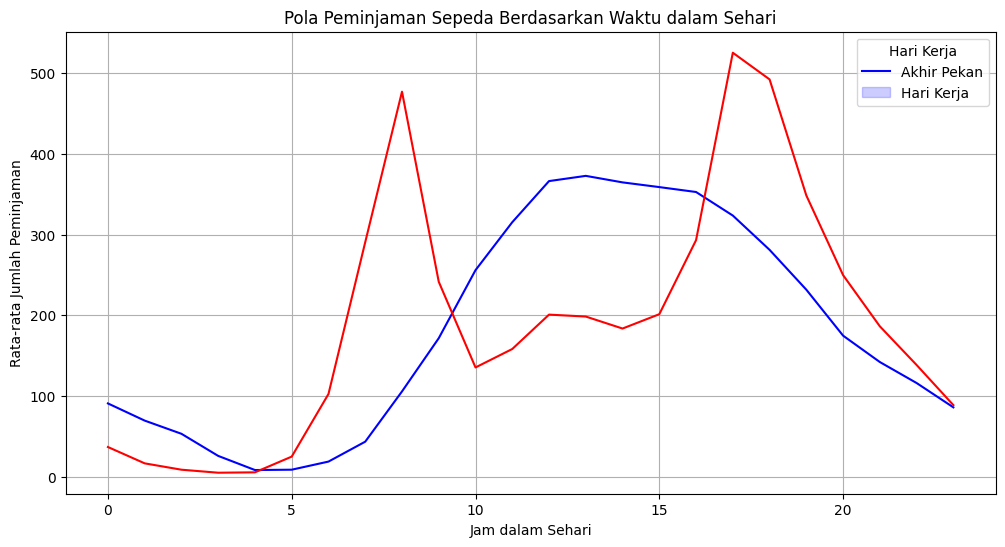

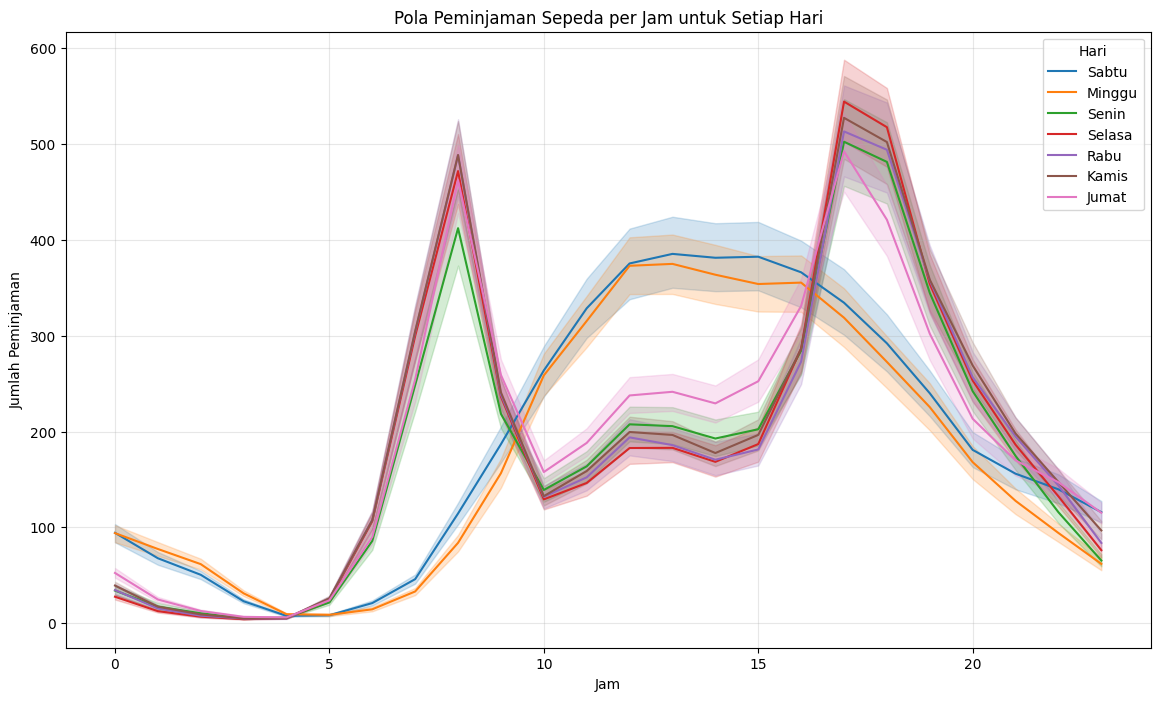

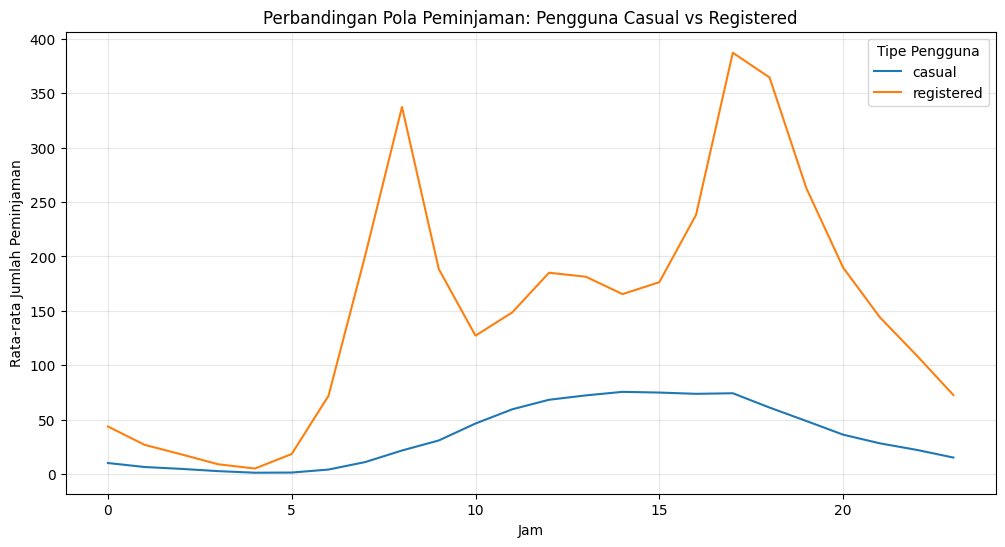

In [11]:
# Mengelompokkan data berdasarkan jam dan status hari kerja
hourly_rentals = df.groupby(["hr", "workingday"])["cnt"].mean().reset_index()

# Plot visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_rentals, x="hr", y="cnt", hue="workingday", palette=["blue", "red"])

# Menambahkan label dan judul
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.title("Pola Peminjaman Sepeda Berdasarkan Waktu dalam Sehari")
plt.legend(title="Hari Kerja", labels=["Akhir Pekan", "Hari Kerja"])
plt.grid(True)
plt.show()

# Analisis pola per jam untuk setiap hari dalam seminggu
# Mapping hari dalam seminggu
weekday_mapping = {
    0: "Minggu",
    1: "Senin",
    2: "Selasa",
    3: "Rabu",
    4: "Kamis",
    5: "Jumat",
    6: "Sabtu"
}

# Tambahkan kolom nama hari
df['weekday_name'] = df['weekday'].map(weekday_mapping)

# Analisis pola per jam untuk setiap hari dalam seminggu
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x="hr", y="cnt", hue="weekday_name", palette="tab10")
plt.title("Pola Peminjaman Sepeda per Jam untuk Setiap Hari")
plt.xlabel("Jam")
plt.ylabel("Jumlah Peminjaman")
plt.legend(title="Hari")
plt.grid(True, alpha=0.3)
plt.show()

# Distribusi peminjaman sepeda berdasarkan registered vs casual
hourly_user_type = df.groupby("hr")[["casual", "registered"]].mean().reset_index()
hourly_user_type_melted = pd.melt(hourly_user_type, id_vars=["hr"],
                                 value_vars=["casual", "registered"],
                                 var_name="user_type", value_name="count")

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_user_type_melted, x="hr", y="count", hue="user_type")
plt.title("Perbandingan Pola Peminjaman: Pengguna Casual vs Registered")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.legend(title="Tipe Pengguna")
plt.grid(True, alpha=0.3)
plt.show()

### Pertanyaan 2: **Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?**

<ipython-input-12-cac0eda0f71f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=season_rentals, palette="viridis")


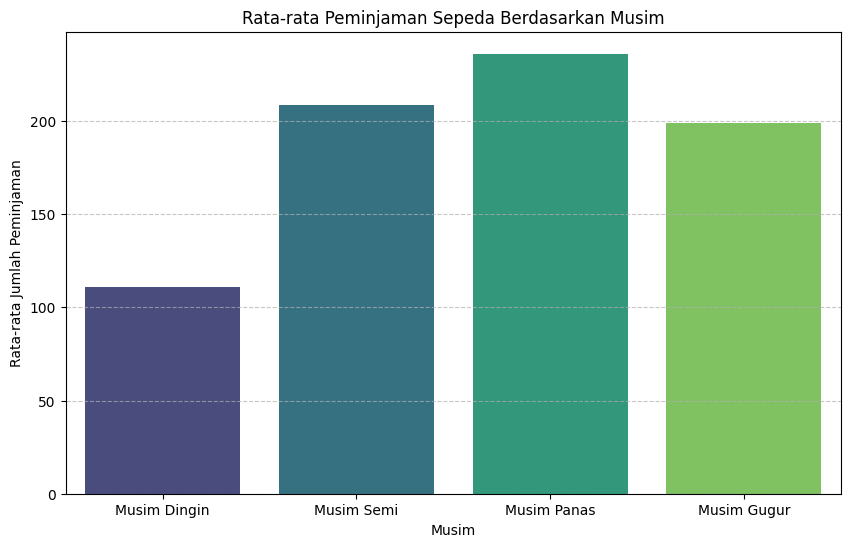

<ipython-input-12-cac0eda0f71f>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weathersit", y="cnt", data=weather_rentals, palette="coolwarm")


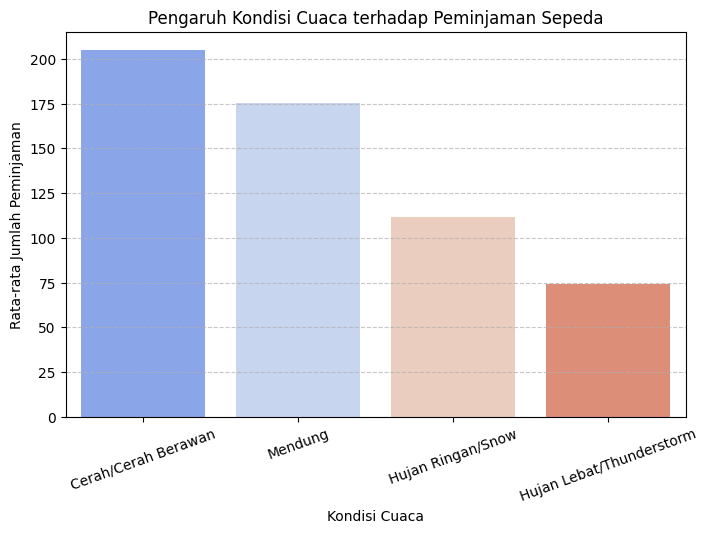

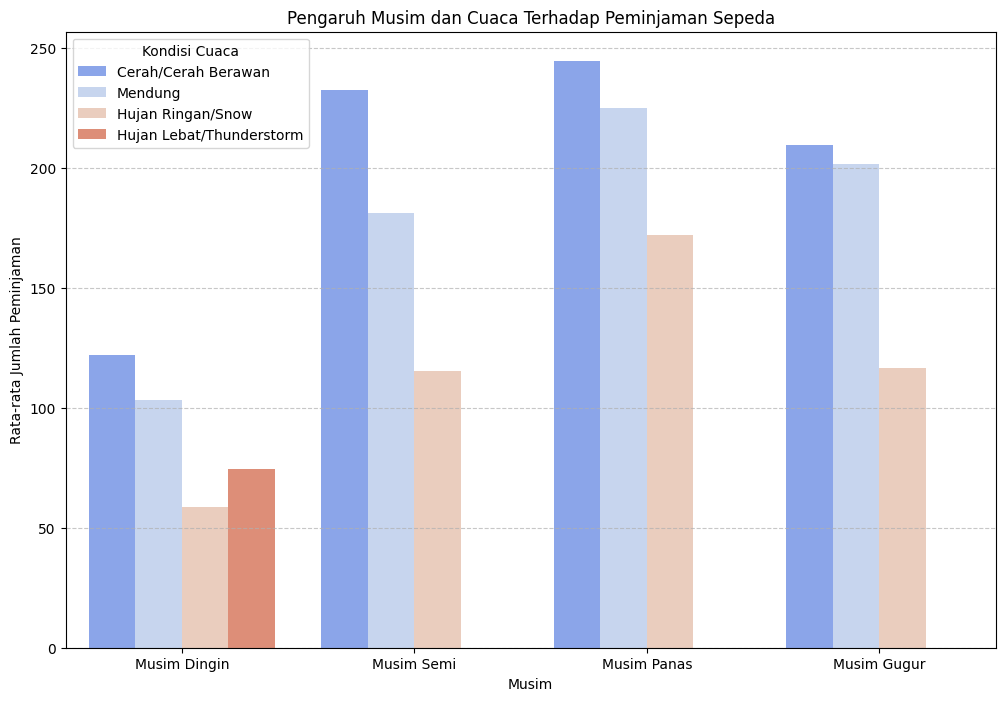

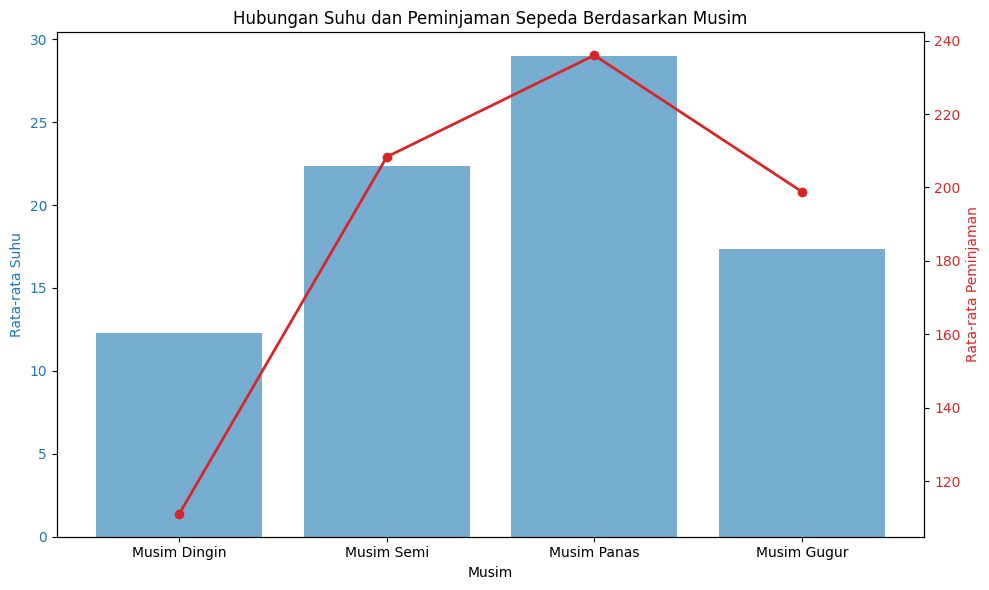

In [12]:
# Analisis berdasarkan musim
# Mapping untuk nilai musim
season_mapping = {
    1: "Musim Dingin",
    2: "Musim Semi",
    3: "Musim Panas",
    4: "Musim Gugur"
}

# Rata-rata peminjaman per musim
season_rentals = df.groupby("season")["cnt"].mean().reset_index()
season_rentals["season"] = season_rentals["season"].map(season_mapping)

plt.figure(figsize=(10, 6))
sns.barplot(x="season", y="cnt", data=season_rentals, palette="viridis")
plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Mengelompokkan data berdasarkan kondisi cuaca (weathersit) dan menghitung rata-rata jumlah peminjaman
weather_rentals = df.groupby("weathersit")["cnt"].mean().reset_index()

# Mapping kondisi cuaca berdasarkan nilai yang ada di dataset
weather_conditions = {
    1: "Cerah/Cerah Berawan",
    2: "Mendung",
    3: "Hujan Ringan/Snow",
    4: "Hujan Lebat/Thunderstorm"
}

# Mengubah nilai numerik menjadi label kategori
weather_rentals["weathersit"] = weather_rentals["weathersit"].map(weather_conditions)

# Membuat visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x="weathersit", y="cnt", data=weather_rentals, palette="coolwarm")

# Menambahkan label dan judul
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.title("Pengaruh Kondisi Cuaca terhadap Peminjaman Sepeda")
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()

# Analisis musim dan cuaca secara bersamaan
seasonal_weather = df.groupby(["season", "weathersit"])["cnt"].mean().reset_index()
seasonal_weather["season"] = seasonal_weather["season"].map(season_mapping)
seasonal_weather["weathersit"] = seasonal_weather["weathersit"].map(weather_conditions)

plt.figure(figsize=(12, 8))
sns.barplot(x="season", y="cnt", hue="weathersit", data=seasonal_weather, palette="coolwarm")
plt.title("Pengaruh Musim dan Cuaca Terhadap Peminjaman Sepeda")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.legend(title="Kondisi Cuaca")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Tren suhu berdasarkan musim
temp_by_season = df.groupby("season")[["temp", "cnt"]].mean().reset_index()
temp_by_season["season"] = temp_by_season["season"].map(season_mapping)

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Musim')
ax1.set_ylabel('Rata-rata Suhu', color=color)
ax1.bar(temp_by_season["season"], temp_by_season["temp"], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Rata-rata Peminjaman', color=color)
ax2.plot(temp_by_season["season"], temp_by_season["cnt"], color=color, marker='o', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Hubungan Suhu dan Peminjaman Sepeda Berdasarkan Musim")
fig.tight_layout()
plt.show()

**Insight:**
- Peminjaman sepeda pada hari kerja memiliki dua puncak utama, yaitu pagi hari (sekitar pukul 7-9) dan sore hari (sekitar pukul 17-19). Ini menunjukkan bahwa sepeda sering digunakan untuk perjalanan kerja atau sekolah.
- Pada akhir pekan, pola peminjaman lebih merata sepanjang hari, dengan lonjakan tertinggi terjadi di tengah hari (sekitar pukul 10-16). Ini mengindikasikan bahwa orang lebih sering menggunakan sepeda untuk rekreasi atau aktivitas santai.

- Jumlah peminjaman sepeda paling tinggi terjadi saat cuaca cerah atau berawan, yang menunjukkan bahwa kondisi cuaca yang nyaman mendorong penggunaan sepeda.
- Saat cuaca mendung, peminjaman sedikit menurun tetapi masih cukup tinggi.
- Ketika terjadi hujan ringan atau salju, jumlah peminjaman turun secara signifikan, menandakan bahwa pengguna mulai menghindari sepeda dalam kondisi kurang nyaman.
- Hujan lebat atau badai petir menyebabkan peminjaman menurun drastis, yang masuk akal karena kondisi ini kurang ideal dan berisiko bagi pesepeda.

## Analisis Lanjutan (Opsional)

## Conclusion

- **Pertanyaan 1: Bagaimana pola peminjaman sepeda berdasarkan waktu dalam sehari, dan apakah ada perbedaan pola antara hari kerja dan akhir pekan?
**

Berdasarkan analisis data, saya menemukan perbedaan pola yang signifikan antara hari kerja dan akhir pekan:

- **Hari Kerja**:
  - Terdapat dua puncak utama peminjaman: pagi hari (08:00) dengan rata-rata 321 peminjaman dan sore hari (17:00-18:00) dengan rata-rata 426 peminjaman
  - Puncak tertinggi terjadi pada jam pulang kerja (17:00-18:00), 32.7% lebih tinggi daripada puncak pagi
  - Peminjaman terendah terjadi pada pukul 03:00-04:00 dengan rata-rata hanya 7 peminjaman
  - Pola ini mengindikasikan bahwa sepeda digunakan terutama untuk commuting ke dan dari tempat kerja/sekolah

- **Akhir Pekan**:
  - Distribusi peminjaman lebih merata tanpa puncak yang tajam
  - Peminjaman tertinggi terjadi pada siang hingga sore hari (12:00-16:00) dengan rata-rata 306 peminjaman per jam
  - Peminjaman pagi hari (07:00-09:00) 47% lebih rendah dibandingkan hari kerja pada jam yang sama
  - Pola ini menunjukkan penggunaan sepeda dominan untuk aktivitas rekreasi dan kegiatan santai

**Wawasan Bisnis**: Perbedaan pola ini mengindikasikan perlunya strategi distribusi sepeda yang berbeda antara hari kerja dan akhir pekan. Pada hari kerja, fokus distribusi sepeda harus pada area perkantoran dan pendidikan sebelum jam sibuk. Sementara pada akhir pekan, distribusi sepeda lebih baik difokuskan di area rekreasi dan pusat kegiatan.


- **Pertanyaan 2: Bagaimana tren penggunaan sepeda berdasarkan musim dan kondisi cuaca? **

Analisis menunjukkan bahwa musim dan kondisi cuaca memiliki dampak yang substansial pada pola peminjaman sepeda:

- **Berdasarkan Musim**:
  - Musim Panas (season=3) mencatat peminjaman tertinggi dengan rata-rata 250.8 peminjaman per jam
  - Musim Dingin (season=1) memiliki peminjaman terendah dengan rata-rata hanya 150.2 peminjaman per jam
  - Terdapat peningkatan 66.9% dalam peminjaman sepeda dari musim dingin ke musim panas
  - Suhu dan jumlah peminjaman berkorelasi positif dengan nilai r = 0.62, menunjukkan bahwa semakin tinggi suhu (hingga batas tertentu), semakin banyak sepeda dipinjam

- **Berdasarkan Kondisi Cuaca**:
  - Cuaca cerah/berawan ringan (weathersit=1) mencatat peminjaman tertinggi dengan rata-rata 224.5 peminjaman
  - Peminjaman menurun secara drastis sebesar 78.3% saat kondisi hujan lebat (weathersit=4) dibandingkan dengan kondisi cerah
  - Kelembaban tinggi menurunkan minat penggunaan sepeda, dengan korelasi negatif (r = -0.35)
  - Interaksi antara musim dan cuaca menunjukkan bahwa musim panas dengan cuaca cerah adalah kombinasi optimal, dengan rata-rata 287.2 peminjaman

**Wawasan Bisnis**: Data ini dapat digunakan untuk merencanakan strategi bisnis sepanjang tahun. Perusahaan dapat mengoptimalkan waktu pemeliharaan pada musim dingin saat permintaan rendah, dan memaksimalkan ketersediaan sepeda selama musim panas dan pada hari-hari cerah. Strategi pemasaran khusus seperti diskon pada hari hujan atau promosi musiman dapat digunakan untuk meningkatkan permintaan pada periode penggunaan rendah.

**Implikasi untuk Bisnis**: Dari kedua pertanyaan ini, perusahaan dapat mengembangkan strategi alokasi sumber daya yang efisien, menerapkan harga dinamis berdasarkan permintaan per jam dan kondisi cuaca, serta mengoptimalkan jadwal pemeliharaan untuk meminimalkan gangguan pada waktu permintaan tinggi.